[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/colemanwalterj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/colemanwalterj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/colemanwalterj/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


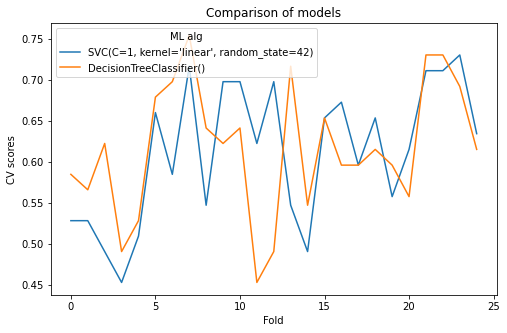

In [1]:
# Decision tree and Linear SVC

# just ignore warnings for now
import warnings
warnings.filterwarnings("ignore")

# imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('..')

# my classes
import auto_budget
from auto_budget.content_encoder import content_encoder
from auto_budget.model_prep import model_prep_select

# path to full dataset
path = '../data/CleanedStatements/full_cat_enc_fresh.xlsx'
mps = model_prep_select(path)

# encode the data
enc_df = mps.encode_for_model(mps.data)

# response and predictor variables
X = enc_df.drop('Category_Cat', axis=1)
y = enc_df['Category_Cat'].copy()

# scikit-learn imports
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

# typical classication models
mods = []
mods.append(SVC(kernel='linear', C=1, random_state=42))
mods.append(DecisionTreeClassifier())
# mods.append(KNeighborsClassifier(n_neighbors=3))
# mods.append(GaussianNB())

# evaluate each model
def approximate_scores(clf,X,y,cvs=10):
    """decide which model is best with feature selection and cross-validation"""    
    model = SelectFromModel(estimator=clf).fit(X, y)
    X_new = model.transform(X)
    scores = cross_val_score(clf, X_new, y, cv=cvs)
    return list(scores)

# create dataframe for showcase
df = pd.DataFrame()
for m in mods:
    scores = approximate_scores(m,X,y,25)
    it = list(np.arange(len(scores)))
    mod_name = [m] * len(scores)
    temp = pd.DataFrame({'scores':scores,'fold':it,'ML alg':mod_name},columns=['scores','fold','ML alg'])
    df = pd.concat([df,temp])
df.reset_index(drop=True,inplace=True)

# plot results
plt.figure(figsize=(8,5))
plt.title('Comparison of models')
plt.ylabel('CV scores')
plt.xlabel('Fold')
sns.lineplot(x = 'fold', y = 'scores', hue = 'ML alg', data = df)
plt.show()

In [8]:
# create dataframe for showcase
df = pd.DataFrame()
for k in range(3,25+1):
    m = KNeighborsClassifier(n_neighbors=k)
    scores = list(cross_val_score(m, X, y, cv=25))
    it = list(np.arange(len(scores)))
    temp = pd.DataFrame({'scores':scores,'fold':it,'k':k},columns=['scores','fold','k'])
    df = pd.concat([df,temp])
df.reset_index(drop=True,inplace=True)

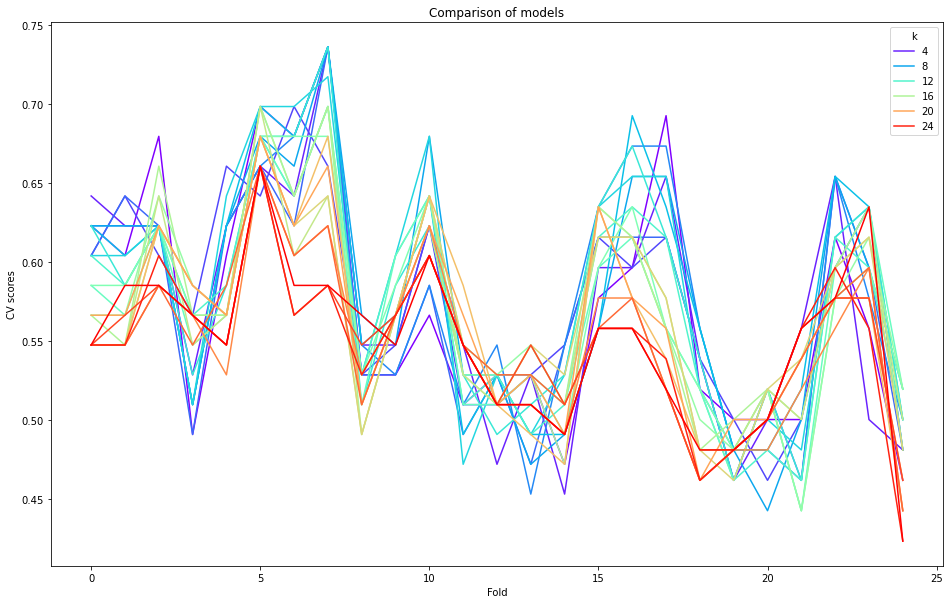

In [10]:
# plot results
plt.figure(figsize=(16,10))
plt.title('Comparison of models')
plt.ylabel('CV scores')
plt.xlabel('Fold')
sns.lineplot(x = 'fold', y = 'scores', hue = 'k', data = df, palette='rainbow')
plt.show()